In [1]:
#carga de librerías

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,  GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [16]:
data= pd.read_csv('newdata2.csv')
data = data.drop('Unnamed: 0',axis=1)
data.head()

,psqi_1,psqi_2,psqi_3,psqi_4,psqi_5a,psqi_5b,psqi_5c,psqi_5d,psqi_5e,psqi_5f,...,employment_covid,institution_measures,normal,normal_units,normal_days,mtq_dif_workday_sleeponset,mtq_dif_workday_sleepend,mtq_dif_freeday_sleeponset,mtq_dif_freeday_sleepend,mtq_dif_chronotype
0,7.230563,10.0,5.968708,6.0,1.0,3.0,3.0,0.0,0.0,0.0,...,0.0,1.0,3.0,3.0,91.5,6.476972,6.476972,6.475433,6.475433,6.475433
1,7.186144,5.0,5.888878,7.0,1.0,3.0,2.0,0.0,0.0,0.0,...,0.0,1.0,3.0,3.0,91.5,3.433987,3.828641,4.110874,3.433987,4.219508
2,0.000000,10.0,6.364751,9.0,1.0,1.0,3.0,0.0,0.0,0.0,...,0.0,1.0,3.0,3.0,91.5,3.433987,4.615121,5.017280,0.000000,4.454347
3,5.017280,10.0,6.493754,10.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,1.0,3.0,3.0,91.5,4.795791,4.110874,4.795791,4.110874,4.510860
4,7.163172,10.0,6.111467,7.0,1.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,3.0,91.5,6.621406,3.433987,3.433987,3.433987,4.110874


In [3]:
data['PSQI_TOTAL'] = data['PSQI_TOTAL'].replace([0,1,2,3,4], 0)
data['PSQI_TOTAL'] = data['PSQI_TOTAL'].replace([5,6,7,8], 1)
data['PSQI_TOTAL'] = data['PSQI_TOTAL'].replace([9,10,11,12,13], 2)
data['PSQI_TOTAL'] = data['PSQI_TOTAL'].replace([14,15,16,17,18], 3)


In [4]:
y = data['PSQI_TOTAL']
X = data.drop('PSQI_TOTAL',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=417)

In [5]:
# Random Forest
from sklearn import metrics
random_forest = RandomForestClassifier(n_estimators=200,criterion="entropy")
random_forest.fit(X_train, y_train)
random_forest_preds = random_forest.predict(X_test)
print('The accuracy of the Random Forests model is :\t',metrics.accuracy_score(random_forest_preds,y_test))

The accuracy of the Random Forests model is :	 0.6859205776173285


In [6]:
y_pred = random_forest.predict(X_test)
print((len(y_test)-sum(abs(y_test-y_pred)))/len(y_test))

0.6714801444043321


In [7]:
import shap 
explainer = shap.TreeExplainer(random_forest)

In [8]:
# Calculate Shap values
choosen_instance = X_test.iloc[[223]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [9]:
# Calculate Shap values
choosen_instance = X_test.iloc[[21]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [10]:
# Calculate Shap values
choosen_instance = X_test.iloc[[133]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [11]:
# Calculate Shap values
choosen_instance = X_test.iloc[[78]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [12]:
# Calculate Shap values
choosen_instance = X_test.iloc[[167]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [13]:
# Calculate Shap values
choosen_instance = X_test.iloc[[5]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [14]:
# Calculate Shap values
choosen_instance = X_test.iloc[[15]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

# Calculate Shap values
choosen_instance = X_test.iloc[[16]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

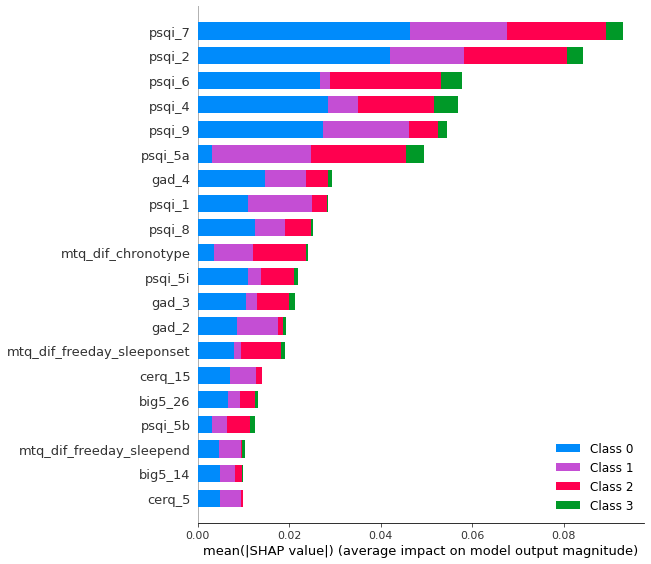

In [15]:
shap.summary_plot(shap_values, X_train)